# Import Files

In [78]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
# simpleImpulser for handling missing values
from sklearn.impute import SimpleImputer
# label encoder for encoding objects types features label as a numerical data.
from sklearn.preprocessing import LabelEncoder
# feature scalling
from sklearn.preprocessing import StandardScaler
# splitting training and testings
from sklearn.model_selection import train_test_split

# model_selection
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#ignoreing Warning

import warnings
warnings.filterwarnings("ignore")

# importing Dataset

In [73]:
dataset = pd.read_csv('weatherAUS.csv')
X = dataset.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
Y = dataset.iloc[:,-1].values
X2 = dataset.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]
Y2 = dataset.iloc[:,-1]

In [35]:
Y = Y.reshape(-1,1)

In [88]:
dataset.shape

(145460, 23)

In [3]:
print(dataset.info())

NameError: name 'dataset' is not defined

In [36]:
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['Uluru' 5.4 26.9 ... 12.5 26.1 'No']
 ['Uluru' 7.8 27.0 ... 15.1 26.0 'No']
 ['Uluru' 14.9 nan ... 15.0 20.9 'No']]


In [37]:
print(Y)

[['No']
 ['No']
 ['No']
 ...
 ['No']
 ['No']
 [nan]]


# Handling missing Data

In [38]:
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X = imputer.fit_transform(X)
Y = imputer.fit_transform(Y)

# After Replacing NAN data with most_frequently used data

In [39]:
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['Uluru' 5.4 26.9 ... 12.5 26.1 'No']
 ['Uluru' 7.8 27.0 ... 15.1 26.0 'No']
 ['Uluru' 14.9 20.0 ... 15.0 20.9 'No']]


In [40]:
print(Y)

[['No']
 ['No']
 ['No']
 ...
 ['No']
 ['No']
 ['No']]


# Encoding Dataset(ML only compute with numerical values thats why we need to encode it as a numerical data)

In [41]:

le1 = LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])
le2 = LabelEncoder()
X[:,4] = le2.fit_transform(X[:,4])
le3 = LabelEncoder()
X[:,6] = le3.fit_transform(X[:,6])
le4 = LabelEncoder()
X[:,7] = le4.fit_transform(X[:,7])
le5 = LabelEncoder()
X[:,-1] = le5.fit_transform(X[:,-1])
le6 = LabelEncoder()
Y[:,-1] = le6.fit_transform(Y[:,-1])

# After Encoding The Given dataset has given bellow

In [42]:
print(X)

[[2 13.4 22.9 ... 16.9 21.8 0]
 [2 7.4 25.1 ... 17.2 24.3 0]
 [2 12.9 25.7 ... 21.0 23.2 0]
 ...
 [41 5.4 26.9 ... 12.5 26.1 0]
 [41 7.8 27.0 ... 15.1 26.0 0]
 [41 14.9 20.0 ... 15.0 20.9 0]]


In [43]:
print(Y)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [44]:
# Y2 =Y.ravel()

In [45]:
Y = np.array(Y,dtype=float)
print(Y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


# Feature Scalling

In [46]:
sc = StandardScaler()
X = sc.fit_transform(X)

# After Scalling Feature

In [47]:
print(X)

[[-1.53166617  0.19132753 -0.04135977 ... -0.01407077  0.02310362
  -0.52979545]
 [-1.53166617 -0.75105231  0.26874452 ...  0.03244663  0.387799
  -0.52979545]
 [-1.53166617  0.11279588  0.35331842 ...  0.62166712  0.22733303
  -0.52979545]
 ...
 [ 1.20928479 -1.06517892  0.52246622 ... -0.69632607  0.65037966
  -0.52979545]
 [ 1.20928479 -0.68822699  0.53656187 ... -0.29317521  0.63579185
  -0.52979545]
 [ 1.20928479  0.42692249 -0.45013361 ... -0.30868102 -0.10818671
  -0.52979545]]


# Data Visualization

In [74]:
# X2 = X
# Y2 = Y 
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [83]:
dataset.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [86]:
dataset.groupby('RainTomorrow').size()

dataset["MinTemp"].fillna(dataset["MinTemp"].mean, inplace = True)
dataset["MaxTemp"].fillna(dataset["MaxTemp"].mean, inplace = True)
dataset["Rainfall"].fillna(dataset["Rainfall"].mean, inplace = True)
dataset["WindGustDir"].fillna(dataset["WindGustDir"].mean, inplace = True)
dataset["WindGustSpeed"].fillna(dataset["WindGustSpeed"].mean, inplace = True)
dataset["WindDir9am"].fillna(dataset["WindDir9am"].mean, inplace = True)

In [87]:
dataset.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      62790
Sunshine         69835
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

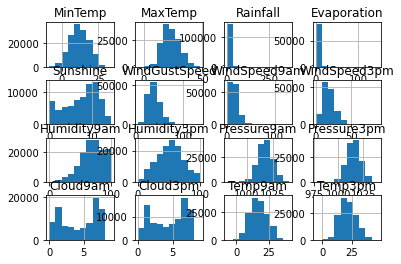

In [79]:
dataset.hist()
pyplot.show()

AttributeError: 'numpy.ndarray' object has no attribute 'value_count'

# Splitting Dataset as training and testing

In [48]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [49]:
X_train.ndim

2

In [50]:
Y_train.ndim


2

In [51]:
print(X_train)

[[-0.12605029 -0.7981713   0.25464887 ...  0.07896404  0.31485992
  -0.52979545]
 [ 0.0145113   0.72534277 -0.19641192 ...  0.5286323  -0.23947704
  -0.52979545]
 [ 1.139004   -0.09138642  0.36741407 ... -0.35519842  0.25650866
  -0.52979545]
 ...
 [-0.12605029 -1.14371058 -1.0703422  ... -1.08397113 -1.18768501
  -0.52979545]
 [ 1.63096955  1.16512003  0.05730978 ...  0.88526575  0.24192085
  -0.52979545]
 [ 0.92816162 -0.67252065 -0.30917712 ... -1.20801754 -0.12277452
  -0.52979545]]


In [52]:
print(Y_train)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [53]:

# classifier = RandomForestClassifier(n_estimators=100,random_state=0)
# classifier.fit(X_train,Y_train.ravel())

In [54]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))

models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

results = []
names = []
temp = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=False)
    cv_results = cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    temp.append(msg)
    print(msg)

temp


LR: 0.842061 (0.004889)
LDA: 0.840747 (0.005080)
KNN: 0.832368 (0.002475)
CART: 0.781925 (0.004554)
NB: 0.802549 (0.003937)


['LR: 0.842061 (0.004889)',
 'LDA: 0.840747 (0.005080)',
 'KNN: 0.832368 (0.002475)',
 'CART: 0.781925 (0.004554)',
 'NB: 0.802549 (0.003937)']

# Optimization Technique

In [55]:
classifier = RandomForestClassifier(n_estimators=100,random_state=0)
classifier.fit(X_train,Y_train)

RandomForestClassifier(random_state=0)

In [56]:
classifier.score(X_train,Y_train)

0.9999484394335213

In [57]:
classifier2 = LogisticRegression()
classifier2.fit(X_train,Y_train)

LogisticRegression()

In [58]:
classifier2.score(X_train,Y_train)

0.8422074797195105

In [59]:
classifier3 = LinearDiscriminantAnalysis()
classifier3.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

In [60]:
classifier3.score(X_train,Y_train)

0.8407294101471194

In [61]:
classifier4 = KNeighborsClassifier()
classifier4.fit(X_train,Y_train)

KNeighborsClassifier()

In [62]:
classifier4.score(X_train,Y_train)

0.8778014574453458